In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

56.89678265739755 -10.086394746769287
-64.74997360310351 49.13757926738995
11.054057866247604 53.57951054481177
67.87642771870321 13.685624294091383
-4.236394066592155 -161.73553423318987
-35.02352664754967 125.8940497006231
-35.84062093725568 175.13303631668276
54.97516138119798 -14.715127627234068
50.42765292721009 124.65167310722552
12.685874294331654 48.861183291658165
-1.3556447343673312 149.98839765779962
17.16262347482197 141.29540013250903
-70.99975872720363 -120.8663826498854
87.42624123887279 -76.7944401447744
6.161518341532371 153.83498983154112
-86.5321006972513 50.50683092676442
31.659887390738817 153.09224888847586
69.52203398223 -118.69651903995904
28.71356147152501 99.68702924227051
2.043308501807317 8.643125168789908
-86.72898191676761 140.93704159409623
15.963191644940082 -68.06600999675837
-50.717469396595014 -19.601590500191577
11.539077433619894 147.72001201684168
49.17668766436884 -64.80306583083222
60.04332170438346 -5.862957515784416
-71.7201481062366 25.2863373

69.76460939782663 -76.61711107446172
62.15685205264762 115.06199985830108
86.94162739341712 164.31000388945375
85.51675780162077 -127.63274441976608
54.27006625407245 156.61742501652776
-54.84739749841366 -12.56149628789251
-75.09406713156496 -52.74061498300834
17.306728336329996 132.6406318270025
71.38123078326367 155.48698834594916
-63.1464490972235 -37.13526408809224
-36.520219963952435 35.03588650559752
-20.322937977531424 137.3361645949292
45.64029970061193 -174.9693931650327
-89.88369074625258 -72.42921437353185
52.28589096563286 -18.3372344532915
49.078291630184935 -162.998992752841
-29.961151852539324 -95.47427266324559
46.765427773126504 -48.76174287878038
-18.825331568437505 -3.7466551098213188
-70.66149976838933 -128.6854723134544
-47.21577116141111 -83.03021120504195
76.08679377066193 17.373927682415513
-39.056327017078466 -132.06583402867972
72.50177567070983 55.835903600697094
-55.49243420810614 -179.59214155516514
-48.487439371710934 -26.16437421058822
-18.58088356199647

-60.913288802727244 103.81128889732628
-0.8124896685730931 -106.494451159071
61.10073060924287 63.81953900495304
-81.3722261193299 174.13541854115988
-45.74798079145503 -123.11936643776535
-11.132547698599154 72.68581451201968
7.131526870480002 -0.8894754784742247
-30.494163537967736 115.12432680616843
73.85698451901868 134.9673986708098
-35.27647045566305 11.514317721968695
38.231031449368174 2.477728140906777
51.92186890789898 -130.45422243135505
-33.72261370191556 -177.66571413483072
-82.44797457984669 -156.5026870971911
16.445089596957814 115.77244680472626
78.84300450696759 99.05465633858023
53.33049665781766 53.90244174427596
-34.427167522071194 28.29115075158043
-79.4533296459683 -74.74065921237779
-73.71107031027766 -132.09026923521785
86.04166496477009 144.08138921604865
-23.261779201638106 10.8716544905364
15.182716760800247 98.22361482436213
-11.64904495969894 -54.68822186008114
37.34991558724876 -58.88473606031721
-32.931714147815455 149.64694638495064
-61.07818116740815 -3

In [5]:
from citipy import citipy

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | killybegs
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | bargal
City not found. Skipping...
Processing Record 4 of Set 1 | ballstad
City not found. Skipping...
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | ngunguru
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | alihe
Processing Record 10 of Set 1 | bosaso
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | xichang
Processing Record 19 of Set 1 | mbini
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | cabo rojo
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | imbituba
Processing Record 40 of Set 4 | port hawkesbury
Processing Record 41 of Set 4 | havoysund
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | panama city
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | keffi
Processing Record 47 of Set 4 | dukat
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | loa janan
Processing Record 50 of Set 4 | erenhot
Processing Record 1 of Set 5 | bryant
Processing Record 2 of Set 5 | alto araguaia
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | mana
Processing Record 5 of Set 5 | sekoma
Processing Record 6 of Set 5 | tarudant
City not found. Skipping...
Processing Record 7 of Set 5 | huanan
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | salym
Processing Record 10 of Set 5 | port elizabeth
Processing Record 11 of Set 5 | uyemskiy
Processing Record 12 of Set 5 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.89,76,49,17.25,PF,2022-07-21 18:18:34
1,Bluff,-46.6000,168.3333,45.57,84,87,8.90,NZ,2022-07-21 18:20:01
2,New Norfolk,-42.7826,147.0587,37.71,85,2,3.31,AU,2022-07-21 18:21:15
3,Praya,14.9215,-23.5087,81.14,69,75,12.66,CV,2022-07-21 18:26:31
4,Busselton,-33.6500,115.3333,57.40,79,61,11.99,AU,2022-07-21 18:19:55
5,Wattegama,6.7989,81.4808,75.78,90,100,5.46,LK,2022-07-21 18:26:32
6,Kavaratti,10.5669,72.6420,81.28,80,69,19.35,IN,2022-07-21 18:26:33
7,Ambilobe,-13.2000,49.0500,67.84,68,1,5.77,MG,2022-07-21 18:21:34
8,Puerto Ayora,-0.7393,-90.3518,82.36,85,85,11.01,EC,2022-07-21 18:18:47
9,Arraial Do Cabo,-22.9661,-42.0278,76.96,73,20,12.66,BR,2022-07-21 18:18:38


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-21 18:18:34,-23.1203,-134.9692,74.89,76,49,17.25
1,Bluff,NZ,2022-07-21 18:20:01,-46.6000,168.3333,45.57,84,87,8.90
2,New Norfolk,AU,2022-07-21 18:21:15,-42.7826,147.0587,37.71,85,2,3.31
3,Praya,CV,2022-07-21 18:26:31,14.9215,-23.5087,81.14,69,75,12.66
4,Busselton,AU,2022-07-21 18:19:55,-33.6500,115.3333,57.40,79,61,11.99
5,Wattegama,LK,2022-07-21 18:26:32,6.7989,81.4808,75.78,90,100,5.46
6,Kavaratti,IN,2022-07-21 18:26:33,10.5669,72.6420,81.28,80,69,19.35
7,Ambilobe,MG,2022-07-21 18:21:34,-13.2000,49.0500,67.84,68,1,5.77
8,Puerto Ayora,EC,2022-07-21 18:18:47,-0.7393,-90.3518,82.36,85,85,11.01
9,Arraial Do Cabo,BR,2022-07-21 18:18:38,-22.9661,-42.0278,76.96,73,20,12.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

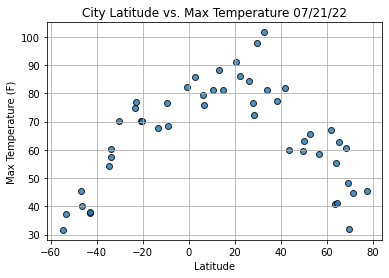

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

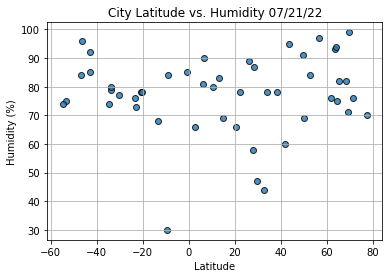

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

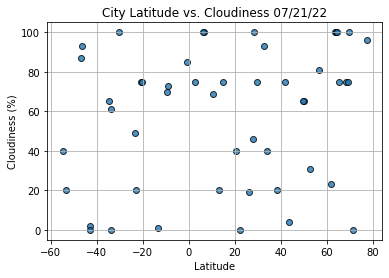

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

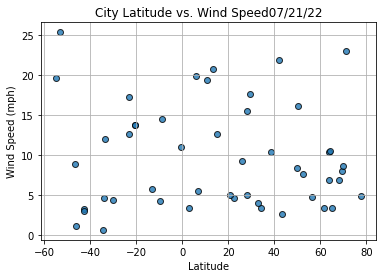

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-07-21 18:19:54
Lat                      -46.1927
Lng                      168.8643
Max Temp                    40.08
Humidity                       96
Cloudiness                     93
Wind Speed                   1.19
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13    False
14     True
15     True
16    False
17     True
18     True
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28    False
29     True
30     True
31     True
32    False
33    False
34     True
35     True
36     True
37    False
38     True
39    False
40    False
41     True
42     True
43     True
44     True
45    False
46     True
47     True
48     True
Name: Lat, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Praya,CV,2022-07-21 18:26:31,14.9215,-23.5087,81.14,69,75,12.66
5,Wattegama,LK,2022-07-21 18:26:32,6.7989,81.4808,75.78,90,100,5.46
6,Kavaratti,IN,2022-07-21 18:26:33,10.5669,72.6420,81.28,80,69,19.35
11,Sibi,PK,2022-07-21 18:26:33,29.5448,67.8764,97.95,47,75,17.60
12,Boa Vista,BR,2022-07-21 18:26:34,2.8197,-60.6733,85.98,66,75,3.44


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

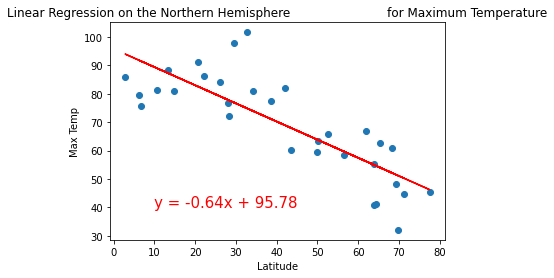

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

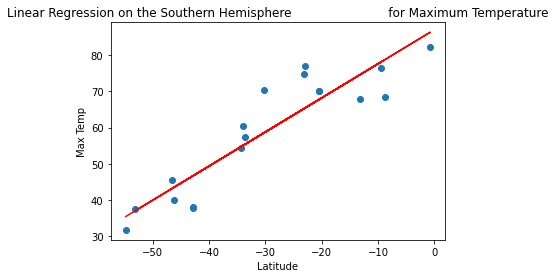

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

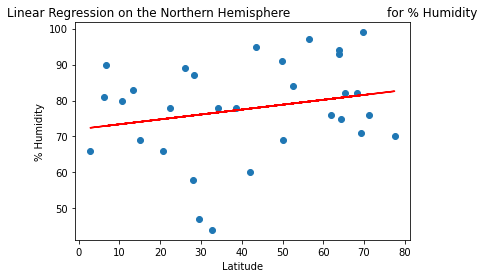

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


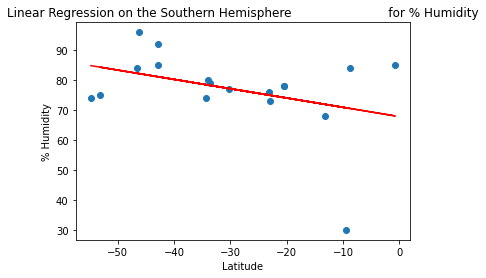

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

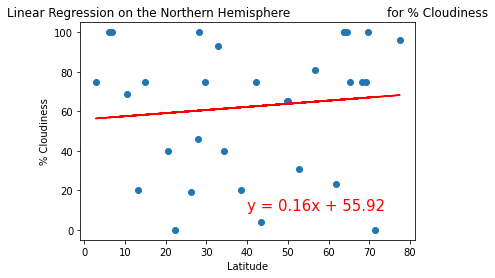

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))


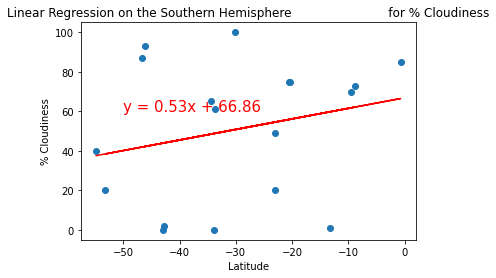

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

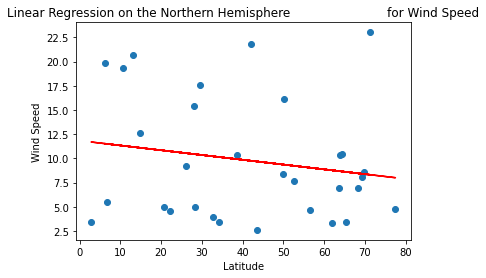

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


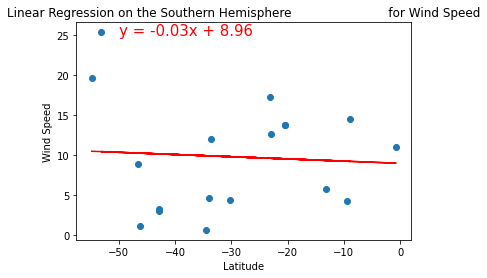

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))
